<a href="https://colab.research.google.com/github/jackie-Gung/Colab_ESAA/blob/main/2022_10_07_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chap 08. 텍스트 분석**
---

### **01. 텍스트 분석 이해**
---

- **개요**
      1. 텍스트 분석이란 '비정형' 데이터인 텍스트를 분석하는 것
      2. 지금까지 ML 모델은 정형 데이터 기반에서 모델을 수립하고 예측을 수행함
      3. 텍스트 분석에서는 주어진 비정형 텍스트 데이터를
         1) 어떻게 피처 형태로 추출할 것인지
         2) 어떻게 추출된 피처에 의미를 부여할 것인지
      4. 피처 백터화(Feature Vectorization) or 피처 추출(Feature Extraction)
         1) 텍스트를 word 기반의 다수의 피처로 추출
         2) 각 피처에 단어 빈도수와 같은 숫자 값 부여
         3) 단어의 조합인 벡터값으로 텍스트는 표현
      5. 피처 백터화 방법
         1) BOW(Bag of Words)
         2) Word2Vec

- **텍스트 분석 수행 프로세스**
  - **텍스트 사전 준비작업:** 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등 클렌징 작업, 단어 토큰화 작업, 제거 작업, 어근 추출 등의 **텍스트 정규화 작업**을 수행함
  - **피처 벡터화/추출:** 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당함
    - **`BOW: Count 기반 & TF-IDF 기반`**
  - **ML 모델 수림 및 학습/예측/평가:** 피처 벡터화된 데이터 세트에 ML 모델을 적용하여 모델링 진행함

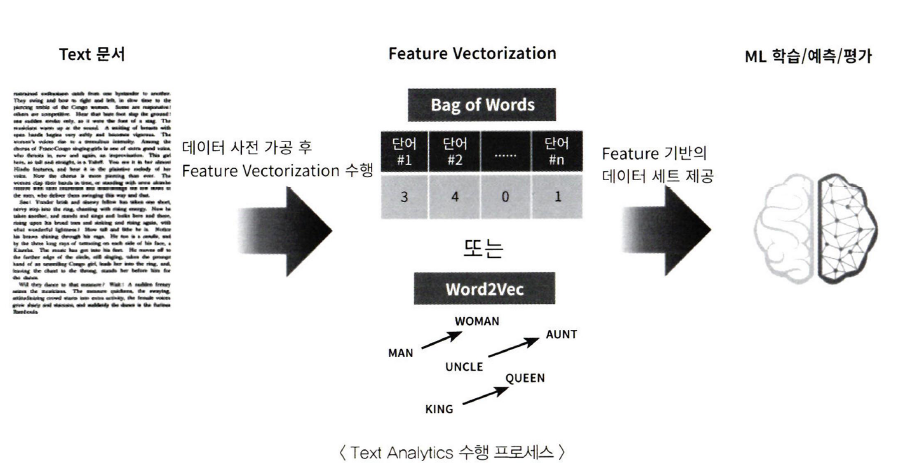

- **파이썬 기반 NLP, 텍스트 분석 패키지**
  - **NLTK:** 방대한 데이터 세트와 서브 모듈, 다양한 데이터 세트를 지원하는 대표적인 NLP 패키지이지만, 수행 성능과 정확도, 신기술 지원 측면에서 부족한 부분 존재
  - **Gensim:** 토픽 모델링 분야에서 가장 두각을 나타내는 패키지로, 다양한 신기능을 제공함. SpaCy와 함께 가장 많이 사용되는 NLP 패키지
  - **SpaCy:** 뛰어난 수행 성능으로 최근에 가장 많이 주목받고 있는 NLP 패키지


### **02. 텍스트 사전 준비 작업(텍스트 전처리) - `텍스트 정규화`**
---

- **개요**
      1. 클렌징: 텍스트에서 분석에 방해되는 불필요한 문자, 기호 등을 사전에 제거하는 작업 
         ex) HTML, XML 태그 혹은 특정 기호
      2. 텍스트 토큰화
         1) 문장 토큰화: 마침표(.), 개행문자(|n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적임
         2) 단어 토큰화: 공백, 콤마(,), 마침표(.), 개행문자 등으로 문장을 단어로 토큰화하는 작업 -> 정규 표현식을 이용해 다양한 유형으로 토큰화 가능함
      3. 스톱 워드 제거: 문장을 구성하는 필수 문법 요소이나 분석에 큰 의미가 없는 단어를 제거하는 작업 
         -> 언어별로 스톱 워드가 목록화 되어있음
      4. Stemming & Lemmatization: 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 작업
         1) Stemming: 원형 단어로 변환 시 일반적이거나 단순한 방법을 사용해 일부 철자가 훼손된 어근 단어를 추출하는 경향이 존재함
            - Porter, Lancaster, Snowball
         2) Lemmmtization: Stemming보다 정교하며, 품사같은 문법적인 요소와 의미를 감안하여 정확한 철자로 된 어근 단어를 찾아줌. 따라서 더 오래 걸림
            - WordNetLemmatizer

#### **1) 문장 토큰화**

In [2]:
# NLTK: sen_tokenize을 사용한 문장 토큰화
from nltk import sent_tokenize
import nltk

nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- **결과:** list 형태로 문장이 반환됨

#### **2) 단어 토큰화**

In [3]:
# NLTK: word_tokenize 사용한 단어 토큰화
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words),len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


#### **3) 문장+단어 토큰화**

In [4]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수
def tokenize_text(text):
  # 문장별로 토큰 분리하기
  sentences = sent_tokenize(text)
  # 각 문장별로 단어 토큰화하기
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 진행하기
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- **결과**
  - 3개의 문장을 토큰화했으므로 word_tokens는 3개의 리스트 객체를 내포하는 리스트
  - 문장을 단어별로 하나씩 토큰화하면 문맥적 의미는 없어짐
  - **n-gram:** 위 문제의 solution으로, 연속된 n개의 단어를 하나의 토큰화 단위로 분리함

#### **4) 스톱 워드 제거**

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
print('영어 stop words 개수: ',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수:  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [8]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

# 위 예제에서 3개 문장별로 얻은 word_tokens list에서 스톱 워드를 제거하는 반복문 만들기
for sentence in word_tokens:
  filtered_words = []
  # 개별 문장별로 토큰화된 문장 list에서 스톱 워드를 제거하기
  for word in sentence:
    # 소문자로 모두 변환하기
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드가 아니면 word_tokens에 추가하기
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


#### **5) Stemming & Lemmatization**

In [10]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


- **결과**
  - work은 진행형, 3인칭 단수, 과거형이 모두 **`work`**에서 비롯되므로 정상적으로 인식함
  - amuse는 amuse가 아닌 **`amus`**를 원형 단어로 인식하는 오류가 생김
  - fancy도 마찬가지로 철자가 다른 단어를 원형으로 인식함

In [13]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


### **03. Bag of Words - BOW**
---

- **개요**
      1. 문서가 가지는 모든 단어를 **문맥이나 순서를 무시**하고 일괄적으로 단어에 대해 **빈도 값을 부여해 피처 값을 추출**하는 모델
      2. 문서 내 모든 단어를 한꺼번에 봉투(Bag) 안에 넣은 후 흔들어서 섞는다는 의미
      3. 예시
         1) 문장1: 'My wife likes to watch baseball game and my daughter likes to watch baseball games too'
         2) 문장2: 'My wife likes to play baseball'
         3) 문장1과 문장2에 있는 모든 단어에서 중복을 제거하고 각 단어를 칼럼 형태로 나열함
         4) 각 단어별로 고유의 인덱스를 부여함
         5) 개별 문장에서 해당 단어가 나타나는 횟수(occurrence)를 기재함
      4. 장단점
         1) 장점: 쉽고 빠름. 단순한 발생 횟수에 의존하지만 문서의 특징을 잘 나타냄
         2) 단점
            - 문맥 의미 반영 부족: 단어 순서를 고려하지 않기에 문맥적인 의미가 무시됨 -> n_gram으로 보완이 가능하나 여전히 문맥적 해석을 처리하지 못함
            - 희소 행렬 문제: 대규모 칼럼으로 구성된 행렬에서 대부분의 값이 0인 행렬을 희소 행렬이라고 하는데, 많은 문서를 BOW로 피처 백터화하면 중복되지 않은 단어수가 많아져 희소 행렬이 될 확률이 높음 -> 알고리즘 수행 시간과 예측 성능을 떨어뜨림

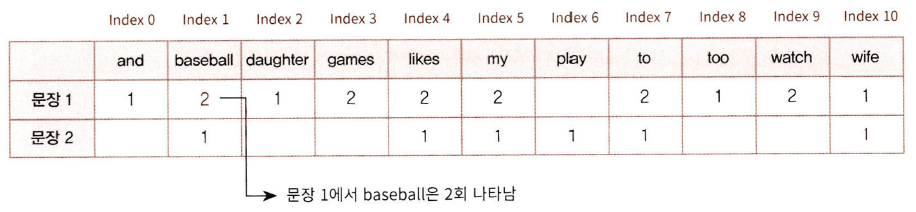

#### **1) BOW 피처 백터화**



- **작업 순서**
  - 모든 문서에서 모든 단어를 칼럼 형태로 나열
  - 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것
    - M개의 문서에서 모든 단어를 추출하고 나열했을 때 N개의 단어가 나온다면 MxN 행렬을 구성하게 됨

- **방법**
  - **count 기반:** 단어 피처에 빈도 수를 부여하는 방식으로, count값이 높을수록 중요한 단어로 인식함
    - 단점은 문법에 필요한 관사 등 언어 특성상 문장에서 자주 사용될 수 밖에 없는 단어까지 높은 값을 부여하게 됨
  - **TF-IDF(Term Frequency-Inverse Document Frequency):** 위의 count 방식을 보완하기 위한 방식으로, 개별 문서에서 자주 등장하는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여함

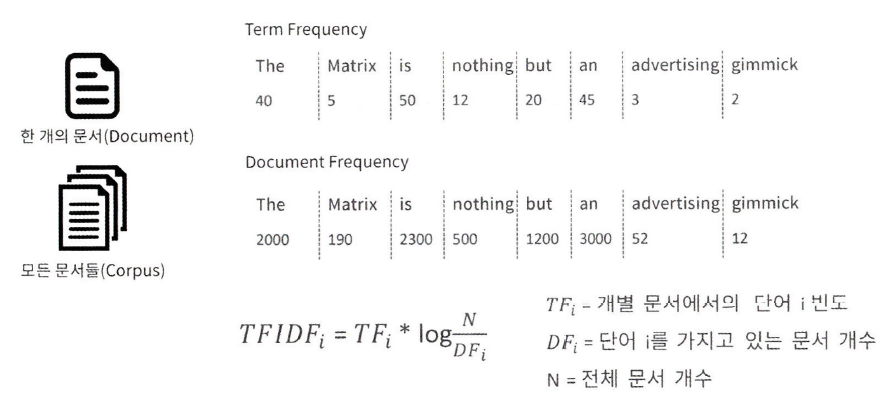

- **CountVectorizer**
      1. max_df: 전체 문서에 걸쳐 빈도수가 너무 높은 단어 피처를 제외하기 위한 파라미터
         1) 정수값: n개 이하로 나타나는 단어만 피처로 추출함
         2) 소수값: 빈도수의 0~n%의 단어만 피처로 추출하고 상위 5%는 피처로 추출하지 않음 
      2. min_df: 전체 문서에 걸쳐 빈도수가 너무 낮은 단어 피처를 제외하기 위한 파라미터
         1) 정수값: n개 이하로 나타나는 단어는 피처로 추출하지 않음
         2) 소수값: n% 이하의 빈도수를 가지는 단어는 피처로 추출하지 않음  
      3. max_features:추출하는 피처의 개수를 제한하며 정수로 값을 지정함
      4. stop_words: 보통 'english'로 지정함
      5. n_gram_range: 단어 순서를 어느정도 보강하기 위한 파라미터
         1) 튜플 형태로 (min,max)
         2) (1,1): 토큰화된 단어를 1개씩 피처로 추출함
         3) (1,n): 토큰화된 단어를 1개씩, 그리고 순서대로 n개씩 묶어서 추출함
      6. analyzer: 피처 추출을 수행한 단위를 지정하는 파라미터
         1) 'word': 디폴트
         2) 'character': 문장의 특정 범위를 피처로 만드는 경우
      7. token_pattern: 토큰화를 수행하는 정규 표현식 패턴을 지정하는 파라미터
      8. tokenizer: 토큰화를 별도으 ㅣ커스텀 함수로 이용시 적용하는 파라미터

- **CountVectorizer로 피처 벡터화**
  - 영어의 경우 모든 문자를 **소문자로 변환**
  - 디폴트 단어 기준으로** n_gram_range 반영**하여 각 단어 토큰화
  - 텍스트 정규화
  - stemming, lemmatization같은 어근 변환은 지원하지 않지만, tokenizer 파라미터로 어근 변환 함수를 적용하면 수행 가능함
  - 마지막으로 나머지 파라미터를 이용해 토큰화된 단어를 피처로 추출하고 단어 빈도수 벡터 값을 적용함

#### **2) BOW 벡터화를 위한 희소 행렬**

##### **희소 행렬 - COO 형식**

- Coordinate 형식은 0이 아닌 데이터만 별도의 데이터 배열(array)에 저장하고 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식
- [[3,0,1],[0,2,0]] -> [3,1,2] -> (0,0),(0,2),(1,1) -> 행: [0,0,1] 열: [0,2,1]
- 사이킷런에서 주로 Scipy를 이용함

In [14]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

In [15]:
from scipy import sparse

# 0이 아닌 데이터 추출하기
data = np.array([3,1,2])
# 행과 열 위치를 각각 배열로 생성하기
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])
# sparse 패키지의 coo_matrix 사용하여 희소 행렬 생성하기
sparse_coo = sparse.coo_matrix((data,(row_pos,col_pos)))

In [17]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

##### **희소 행렬 - CSR 형식**

- Compressed Sparse Row 형식은 COO 형식의 문제를 보완한 방식
  - COO: 행과 열의 위치를 알기 위해 반복적인 위치 데이터 사용해야함
  - CSR: 행과 열 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식

In [18]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출하기
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행과 열 위치를 각각 array로 생성하기
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2,(row_pos,col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생서하기
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환하기
sparse_csr = sparse.csr_matrix((data2,col_pos,row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [19]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])
coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)